In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

In [2]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# 데이터 경로 맞춰주세요!
# 혹시 코랩환경을 사용하신다면 왼쪽 폴더모양 아이콘을 눌러 "train_data.csv"를 드래그&드롭으로 업로드한 후 사용해주세요
DATA_PATH = '/opt/ml/input/data/train_data.csv'
train_df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
train_df = train_df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 4 s, sys: 320 ms, total: 4.32 s
Wall time: 4.32 s


In [3]:
train_df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   userID            int16         
 1   assessmentItemID  object        
 2   testId            object        
 3   answerCode        int8          
 4   Timestamp         datetime64[ns]
 5   KnowledgeTag      int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 62.7+ MB


In [5]:
test_df = pd.read_csv('/opt/ml/input/data/test_data.csv', dtype=dtype, parse_dates=['Timestamp'])

test_df = test_df[test_df['answerCode'] != -1]
test_df = test_df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259370 entries, 0 to 259369
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userID            259370 non-null  int16         
 1   assessmentItemID  259370 non-null  object        
 2   testId            259370 non-null  object        
 3   answerCode        259370 non-null  int8          
 4   Timestamp         259370 non-null  datetime64[ns]
 5   KnowledgeTag      259370 non-null  int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 7.2+ MB


In [7]:
df = pd.concat([train_df, test_df])

In [8]:
df


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2525956 entries, 0 to 259369
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   userID            int16         
 1   assessmentItemID  object        
 2   testId            object        
 3   answerCode        int8          
 4   Timestamp         datetime64[ns]
 5   KnowledgeTag      int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 89.1+ MB


## userID

In [10]:
df.userID.nunique()

7442

In [11]:
# 유저별 푼 문항수, 정답률

user_groupby = df.groupby('userID').agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
})

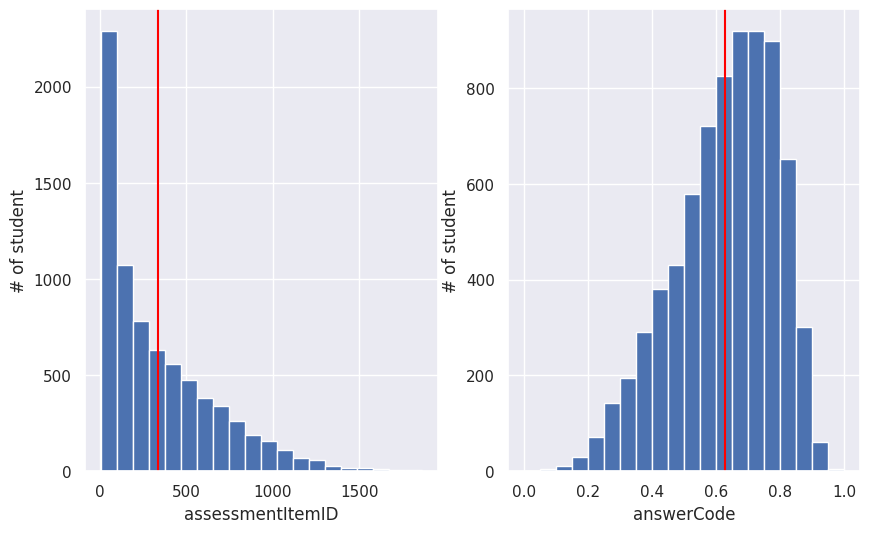

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for ax, column in zip(axs, user_groupby.columns):
    user_groupby[column].hist(bins=20, ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('# of student')
    ax.axvline(user_groupby[column].mean(), color='red')

In [13]:
df.KnowledgeTag.nunique()

912

In [14]:
# 유저별 푼 태그 분포도 및 정답률
# 한 유저가 많이 푼 태그이거나 정답률이 높은 태그를 가진 문제에 대해서는 정답률이 높지 않을까? 
# 유저의 feature로 사용할 수 있지 않을까?
# 하지만 정답률이 높은 경우 한 문제만 푼 경우도 있을 수 있어서 조심해야 할듯
# 별 상관관계가 없는듯..

user_tag_groupby = df.groupby(['userID', 'KnowledgeTag']).agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
})

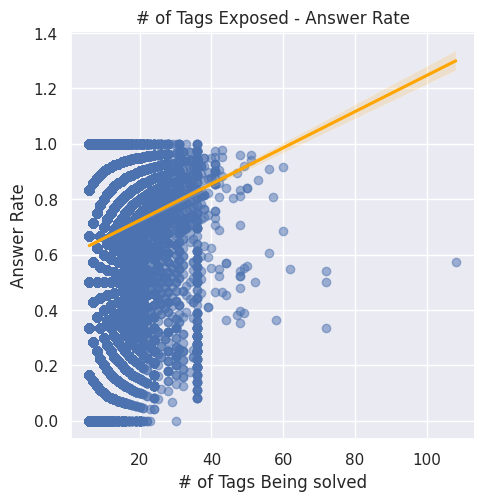

In [15]:
g = sns.lmplot(
    data=user_tag_groupby[user_tag_groupby['assessmentItemID'] > 5],
    x='assessmentItemID',
    y='answerCode',
    scatter_kws={'alpha':0.5},
    line_kws={"color": "orange"}
)
g.set_xlabels('# of Tags Being solved')
g.set_ylabels('Answer Rate')
ax = plt.gca()

ax.set_title('# of Tags Exposed - Answer Rate');

In [16]:
user_tag_groupby[user_tag_groupby['assessmentItemID'] > 5].corr()['assessmentItemID']['answerCode']

0.08757437872985208

In [17]:
user_tag_groupby = df.groupby(['userID', 'KnowledgeTag']).agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
})

user_groupby = df.groupby('userID').agg({'answerCode':'mean'})
user_groupby.rename(columns={'answerCode': 'answer_rate'}, inplace=True)

user_tag_groupby = user_tag_groupby.merge(user_groupby, on='userID')

user_tag_groupby = user_tag_groupby.reset_index().sort_values(['userID', 'assessmentItemID'], ascending=False)
user_tag_groupby

,userID,assessmentItemID,answerCode,answer_rate
492305,7441,5,0.200000,0.555556
492306,7441,4,1.000000,0.555556
492299,7440,5,0.200000,0.400000
492302,7440,4,0.500000,0.400000
492300,7440,3,0.666667,0.400000
...,...,...,...,...
130,0,1,1.000000,0.630872
137,0,1,0.000000,0.630872
157,0,1,1.000000,0.630872
159,0,1,0.000000,0.630872


In [18]:
users = df.userID.unique()
idx = []

for user in users:
    idx.append(user_tag_groupby[user_tag_groupby['userID'] == user].index[0])

In [19]:
df_copy = user_tag_groupby.iloc[idx]
df_copy

,userID,assessmentItemID,answerCode,answer_rate
492203,7419,5,0.800000,0.294118
492128,7401,1,0.000000,0.842105
491983,7373,4,0.500000,0.714286
491605,7298,1,1.000000,0.440000
491491,7277,5,0.800000,0.800000
...,...,...,...,...
218,1,3,1.000000,0.853162
104,0,15,0.266667,0.630872
91,0,6,0.500000,0.630872
141,0,6,0.666667,0.630872


In [20]:
df_copy['deviation'] = df_copy['answerCode'] - df_copy['answer_rate']
df_copy

/tmp/ipykernel_25963/4260504560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['deviation'] = df_copy['answerCode'] - df_copy['answer_rate']


,userID,assessmentItemID,answerCode,answer_rate,deviation
492203,7419,5,0.800000,0.294118,0.505882
492128,7401,1,0.000000,0.842105,-0.842105
491983,7373,4,0.500000,0.714286,-0.214286
491605,7298,1,1.000000,0.440000,0.560000
491491,7277,5,0.800000,0.800000,0.000000
...,...,...,...,...,...
218,1,3,1.000000,0.853162,0.146838
104,0,15,0.266667,0.630872,-0.364206
91,0,6,0.500000,0.630872,-0.130872
141,0,6,0.666667,0.630872,0.035794


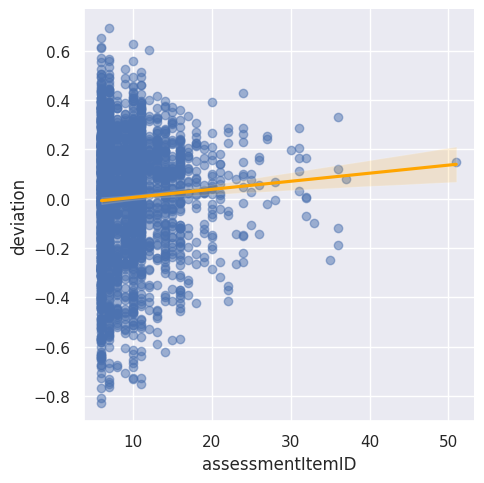

In [21]:
g = sns.lmplot(
    data=df_copy[df_copy['assessmentItemID'] > 5],
    x='assessmentItemID',
    y='deviation',
    scatter_kws={'alpha':0.5},
    line_kws={"color": "orange"}
)

In [22]:
df_copy[df_copy['assessmentItemID'] > 5].corr()['assessmentItemID']['answerCode']

0.09722603585160242

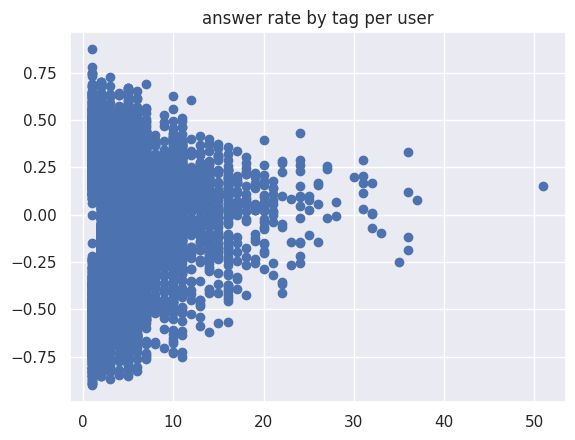

In [23]:
fig, ax = plt.subplots()

ax.set_title("answer rate by tag per user")
ax.scatter(df_copy["assessmentItemID"], df_copy["deviation"])

In [24]:
# 날짜
df['date'] = df['Timestamp'].dt.date

# 시간대
df['hour'] = df['Timestamp'].dt.hour

df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0
...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23


In [25]:
hour_groupby = df.groupby(['hour']).agg({
    'assessmentItemID' : 'count',
    'answerCode': 'mean',
}).reset_index()

hour_groupby['hour'] = hour_groupby['hour'].apply(lambda x: x+9)

In [26]:
hour_groupby['hour'] = hour_groupby['hour'].apply(lambda x: x-24 if x >= 24 else x)

In [27]:
hour_groupby = hour_groupby.sort_values('hour')

hour_groupby

,hour,assessmentItemID,answerCode
15,0,14182,0.664927
16,1,12306,0.578580
17,2,13834,0.545251
18,3,17136,0.541725
19,4,23732,0.532277
20,5,29483,0.535902
21,6,38750,0.586116
22,7,66195,0.643583
23,8,90089,0.659126
0,9,112534,0.650799


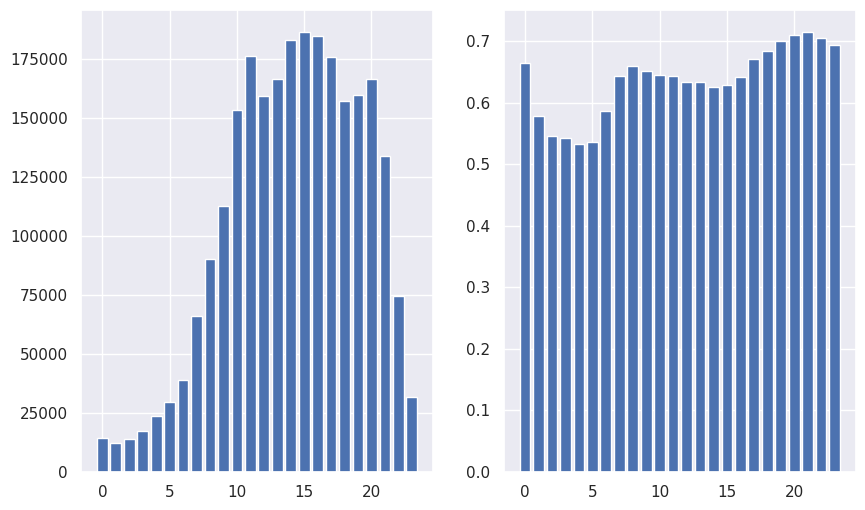

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for ax, column in zip(axs, hour_groupby.columns[1:]):
    ax.bar(hour_groupby['hour'], hour_groupby[column]) 


## testId

In [29]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0
...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23


In [30]:
df['difficulty'] = df['testId'].apply(lambda x: x[1:4])

In [31]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour,difficulty
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0,060
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0,060
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0,060
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0,060
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0,060
...,...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7,040
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23,040
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23,040
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23,040


In [214]:
item_difficulty_groupby = df.groupby(['assessmentItemID', 'difficulty']).agg({'answerCode': 'mean'})
item_difficulty_groupby = item_difficulty_groupby.reset_index().sort_values(['difficulty'])

<Axes: title={'center': 'answer rate by difficulty level per user'}, xlabel='difficulty', ylabel='answerCode'>

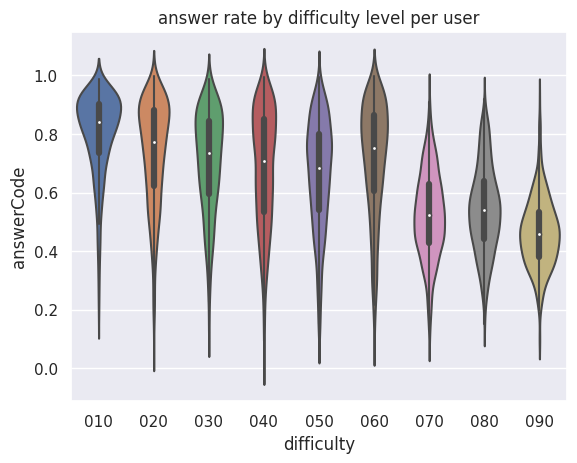

In [215]:
# 유저별 해당 난이도의 정답률 분포

fig, ax = plt.subplots()

ax.set_title("answer rate by difficulty level per user")
sns.violinplot(x="difficulty", y="answerCode", data=item_difficulty_groupby.sort_values('difficulty'))

In [32]:
user_difficulty_groupby = df.groupby(['userID', 'difficulty']).agg({'answerCode': 'mean', 'assessmentItemID': 'count'})

In [33]:
user_difficulty_groupby

answerCode  assessmentItemID
userID difficulty                              
0      020           0.722222                36
       060           0.791908               346
       080           0.468320               363
1      040           0.822719               581
       090           0.903409               352
...                       ...               ...
7439   040           0.733333                15
7440   030           0.400000                10
       050           0.400000                 5
7441   030           0.200000                 5
       040           1.000000                 4

[19739 rows x 2 columns]

In [34]:
user_difficulty_groupby = user_difficulty_groupby.reset_index().sort_values(['userID', 'difficulty'])

In [35]:
user_difficulty_groupby.head(20)

,userID,difficulty,answerCode,assessmentItemID
0,0,020,0.722222,36
1,0,060,0.791908,346
2,0,080,0.468320,363
3,1,040,0.822719,581
4,1,090,0.903409,352
5,2,030,0.876404,178
6,2,050,0.132653,98
7,3,020,0.879310,174
8,3,050,0.655052,861
9,4,010,0.868217,129


In [36]:
user_groupby = df.groupby('userID').agg({'answerCode':'mean'})
user_groupby.rename(columns={'answerCode': 'answer_rate'}, inplace=True)

user_difficulty_groupby = user_difficulty_groupby.merge(user_groupby, on='userID')

In [37]:
user_difficulty_groupby

,userID,difficulty,answerCode,assessmentItemID,answer_rate
0,0,020,0.722222,36,0.630872
1,0,060,0.791908,346,0.630872
2,0,080,0.468320,363,0.630872
3,1,040,0.822719,581,0.853162
4,1,090,0.903409,352,0.853162
...,...,...,...,...,...
19734,7439,040,0.733333,15,0.733333
19735,7440,030,0.400000,10,0.400000
19736,7440,050,0.400000,5,0.400000
19737,7441,030,0.200000,5,0.555556


,userID,difficulty,answerCode,assessmentItemID,answer_rate
6525,2436,010,0.836735,147,0.780000
6777,2529,010,0.705645,248,0.618421
17872,6724,010,0.600000,10,0.333333
12112,4543,010,0.842520,127,0.821192
4813,1796,010,0.993377,151,0.842697
...,...,...,...,...,...
3726,1396,090,0.820163,367,0.698159
13157,4940,090,0.466667,30,0.666667
18271,6875,090,0.300000,30,0.518519
3802,1423,090,0.208955,201,0.662568


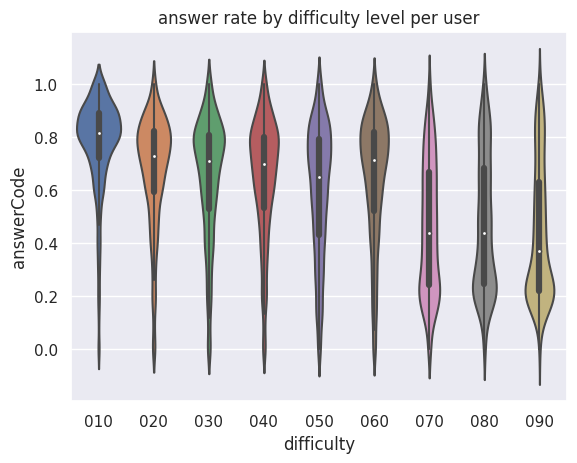

In [38]:
# 유저별 해당 난이도의 정답률 분포

fig, ax = plt.subplots()

ax.set_title("answer rate by difficulty level per user")
sns.violinplot(x="difficulty", y="answerCode", data=user_difficulty_groupby.sort_values('difficulty'))

user_difficulty_groupby.sort_values('difficulty')

In [39]:
# 060에 비해서 050이 아래 위로 더 넓은 분포
# 060에 비해서 050을 푼 학생들의 평균 정답률이 더 낮지 않을까?

In [40]:
dfficulty_groupby = user_difficulty_groupby.groupby('difficulty').agg({'answer_rate':'mean', 'assessmentItemID':'sum', 'userID':'count'})

In [41]:
dfficulty_groupby
# 해당 난이도를 푼 유저의 평균 정답률은 별로 차이나지 않는다는 것을 알 수 있다.
# 오히려 높은 레벨의 문제를 푼 유저들의 평균 정답률이 낮다는 것을 알 수 있다.

,answer_rate,assessmentItemID,userID
difficulty,,,
010,0.674811,303675,2301
020,0.647538,297263,2481
030,0.635753,303365,2724
040,0.633961,300403,2974
050,0.622848,306317,2577
060,0.636667,296284,2364
070,0.580769,315177,1882
080,0.584488,271841,1693
090,0.569256,131631,743


<Axes: title={'center': 'total answer rate by difficulty level per user'}, xlabel='difficulty', ylabel='answer_rate'>

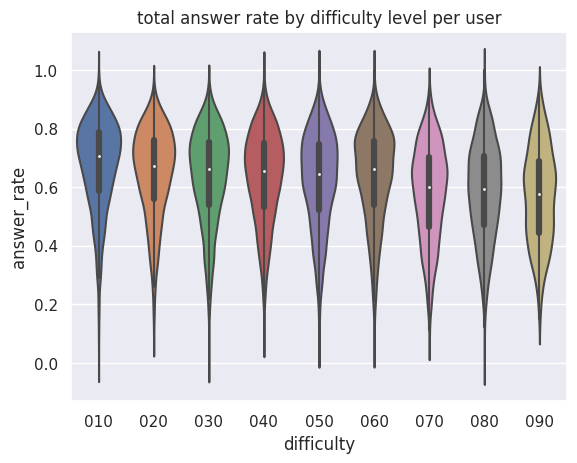

In [42]:
# 해당 난이도의 문제를 푼 유저들의 평균 정답률 분포
fig, ax = plt.subplots()

ax.set_title("total answer rate by difficulty level per user")
sns.violinplot(x="difficulty", y="answer_rate", data=user_difficulty_groupby.sort_values('difficulty'))

# 050에 비해서 060을 푼 유저들의 평균 정답률이 약간 높다는 것을 알 수 있다.

In [43]:
user_groupby.describe()

,answer_rate
count,7442.000000
mean,0.628749
std,0.159608
min,0.000000
25%,0.526782
50%,0.651923
75%,0.750728
max,1.000000


In [44]:
# 070, 080이나 090을 푼 상위 25%의 유저들의 difficulty 별 정답률은 높을까?

users = df.userID.unique()
user_df = pd.DataFrame({'userID':[]})

for user in users:
    diff_list = user_difficulty_groupby[user_difficulty_groupby['userID'] == user]['difficulty'].tolist()
    if ('070' in  diff_list or '080' in diff_list or '090' in diff_list) and (user_difficulty_groupby[user_difficulty_groupby['userID'] == user]['answer_rate'].values[0] > 0.75):
        user_df.loc[len(user_df), 'userID'] = user

In [45]:
high_level_users = user_df.merge(user_difficulty_groupby, on='userID').sort_values('difficulty')

<Axes: title={'center': 'total answer rate by difficulty level per user'}, xlabel='difficulty', ylabel='answerCode'>

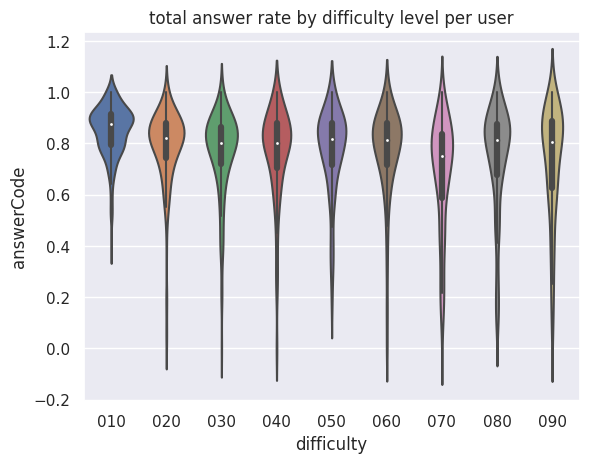

In [46]:
fig, ax = plt.subplots()

ax.set_title("total answer rate by difficulty level per user")
sns.violinplot(x="difficulty", y="answerCode", data=high_level_users)

# 전체 유저의 분포보다 높게 위치한다는 것을 알 수 있다.

In [47]:
# 분포상으로 봤을 때 070의 난이도가 080이나 090보다 높을 수도 있을 것 같다.
# 난이도라는 feature을 추가하게 되면 category feature로 추가될 것 같은데 
# 050이 060보다 난이도가 높고 낮은게 중요한가? 몇개의 난이도로 나눌 것인지가 중요한 것 아닌가?
# (1, 2, 3) (4, 5, 6) (7, 8, 9) 세 개의 난이도로 나누거나 그냥 그대로 가면 될듯? 

## Timestamp

In [48]:
# diff(): 행 - 바로전 행 
# 코드에 nan 값을 0으로 채우는 코드가 있는데 
# 얼마나 걸렸는지는 알 수 없는데 0으로 채우면 안그래도 0으로 치우쳐진 분포가 더 0으로 치우쳐지고 
# 유저의 평균 elapsed time을 구하는데도 좋지 않은 영향을 줄것으로 예상되어 그냥 nan 값으로 나둠

diff = df.loc[:, ['userID', 'Timestamp']].groupby('userID').diff().shift(-1)#.fillna(pd.Timedelta(seconds=0))
#diff = diff.fillna(pd.Timedelta(seconds=0))
# total_seconds(): 모든 속성을 초단위로 모아서 변환
diff = diff['Timestamp'].apply(lambda x: x.total_seconds())

df['elapsed'] = diff

In [49]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour,difficulty,elapsed
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0,060,3.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0,060,8.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0,060,7.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0,060,7.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0,060,11.0
...,...,...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7,040,4721258.0
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23,040,18.0
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23,040,21.0
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23,040,89.0


In [50]:
import numpy as np

In [51]:
# IQR을 이용해 elapsed time의 uppeer bound의 이상치를 nan 값으로 제거했다 (320초 이상일 때 이상치라고 판별 - 조정해보면 될듯)

Q1 = df['elapsed'].quantile(0.25)
Q3 = df['elapsed'].quantile(0.75)

IQR = Q3 - Q1

low_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

idx = df[df['elapsed'] > upper_bound].index
df.loc[idx, 'elapsed'] = np.nan

In [52]:
df.describe()

,userID,answerCode,Timestamp,KnowledgeTag,hour,elapsed
count,2.525956e+06,2.525956e+06,2525956,2.525956e+06,2.525956e+06,1.977978e+06
mean,2.082610e+03,6.546385e-01,2020-07-18 15:12:02.504639488,4.908872e+03,8.145223e+00,4.650855e+01
min,0.000000e+00,0.000000e+00,2019-12-31 15:08:01,2.300000e+01,0.000000e+00,0.000000e+00
25%,8.000000e+02,0.000000e+00,2020-05-19 05:13:08.750000128,1.934000e+03,4.000000e+00,1.000000e+01
50%,1.748000e+03,1.000000e+00,2020-07-30 06:51:01,5.258000e+03,7.000000e+00,2.600000e+01
75%,3.034000e+03,1.000000e+00,2020-09-21 11:14:14.750000128,7.913000e+03,1.100000e+01,5.900000e+01
max,7.441000e+03,1.000000e+00,2020-12-29 16:46:21,1.127100e+04,2.300000e+01,3.200000e+02
std,1.585106e+03,4.754861e-01,NaN,3.302930e+03,5.931763e+00,5.671526e+01


<Axes: title={'center': 'elapsed time by answerCode'}, xlabel='answerCode', ylabel='elapsed'>

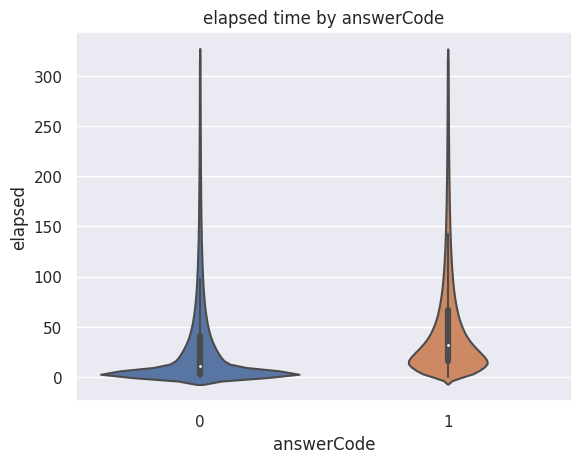

In [53]:
fig, ax = plt.subplots()

ax.set_title("elapsed time by answerCode")
sns.violinplot(x="answerCode", y="elapsed", data=df)

# 오답인 경우에 elapsed time이 0에 가깝게 분포한다. 찍는 경우가 많은 듯

In [54]:
# 찍는 학생이 적을 것으로 기대되는 경우에도 오답일 경우의 분포가 위와 비슷한지 알아보자 (상위 75%의 분포)

user_groupby = df.groupby('userID').agg({'answerCode':'mean'})
user_groupby.rename(columns={'answerCode': 'answer_rate'}, inplace=True)

df_copy = df.copy()

df_copy = df_copy.merge(user_groupby, on='userID')

df_copy.describe()

,userID,answerCode,Timestamp,KnowledgeTag,hour,elapsed,answer_rate
count,2.525956e+06,2.525956e+06,2525956,2.525956e+06,2.525956e+06,1.977978e+06,2.525956e+06
mean,2.082610e+03,6.546385e-01,2020-07-18 15:12:02.504639488,4.908872e+03,8.145223e+00,4.650855e+01,6.546385e-01
min,0.000000e+00,0.000000e+00,2019-12-31 15:08:01,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+02,0.000000e+00,2020-05-19 05:13:08.750000128,1.934000e+03,4.000000e+00,1.000000e+01,5.662651e-01
50%,1.748000e+03,1.000000e+00,2020-07-30 06:51:01,5.258000e+03,7.000000e+00,2.600000e+01,6.784314e-01
75%,3.034000e+03,1.000000e+00,2020-09-21 11:14:14.750000128,7.913000e+03,1.100000e+01,5.900000e+01,7.676768e-01
max,7.441000e+03,1.000000e+00,2020-12-29 16:46:21,1.127100e+04,2.300000e+01,3.200000e+02,1.000000e+00
std,1.585106e+03,4.754861e-01,NaN,3.302930e+03,5.931763e+00,5.671526e+01,1.480152e-01


In [55]:
idx = df_copy[df_copy['answer_rate'] > 0.57].index
df_filter = df_copy.loc[idx, :]

<Axes: title={'center': 'elapsed time  by answerCode for the top 75% of users'}, xlabel='answerCode', ylabel='elapsed'>

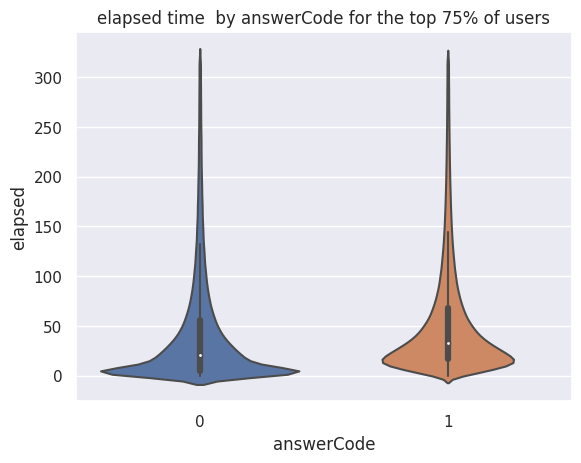

In [56]:
fig, ax = plt.subplots()

ax.set_title("elapsed time  by answerCode for the top 75% of users")
sns.violinplot(x="answerCode", y="elapsed", data=df_filter)

# 위의 그래프보다는 아니지만 answerCode 0과 1사이의 elapsed time 분포가 차이가 있다

In [57]:
# 위에서 그린 violin plot을 bining한 barplot을 통해 좀더 자세한 분포를 알아보자

bins = 100
df_copy['bins'] = pd.cut(
    df_copy.elapsed,
    [i * (df_copy.elapsed.max() - df_copy.elapsed.min()) / bins for i in range(bins)]
)

df_copy['label'] = df_copy.bins.apply(lambda x: (x.left + x.right)//2)

In [58]:
df_copy

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour,difficulty,elapsed,answer_rate,bins,label
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0,060,3.0,0.630872,"(0.0, 3.2]",1.0
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0,060,8.0,0.630872,"(6.4, 9.6]",8.0
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0,060,7.0,0.630872,"(6.4, 9.6]",8.0
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0,060,7.0,0.630872,"(6.4, 9.6]",8.0
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0,060,11.0,0.630872,"(9.6, 12.8]",11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525951,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7,040,NaN,0.733333,NaN,NaN
2525952,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23,040,18.0,0.733333,"(16.0, 19.2]",17.0
2525953,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23,040,NaN,0.733333,NaN,NaN
2525954,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23,040,89.0,0.733333,"(86.4, 89.6]",88.0


In [59]:
df_copy = df_copy.dropna()

df_copy['label'] = df_copy['label'].astype(int)

/tmp/ipykernel_25963/2738826550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['label'] = df_copy['label'].astype(int)


In [60]:
label_answerCode_groupby  = df_copy.groupby(['label', 'answerCode']).agg({'assessmentItemID':'count'})

label_answerCode_groupby = label_answerCode_groupby.reset_index()

In [61]:
label_answerCode_groupby.label.unique()[:30]

array([ 1,  4,  8, 11, 14, 17, 20, 24, 27, 30, 33, 36, 40, 43, 46, 49, 52,
       56, 59, 62, 65, 68, 72, 75, 78, 81, 84, 88, 91, 94])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1'),
  Text(1, 0, '4'),
  Text(2, 0, '8'),
  Text(3, 0, '11'),
  Text(4, 0, '14'),
  Text(5, 0, '17'),
  Text(6, 0, '20'),
  Text(7, 0, '24'),
  Text(8, 0, '27'),
  Text(9, 0, '30'),
  Text(10, 0, '33'),
  Text(11, 0, '36'),
  Text(12, 0, '40'),
  Text(13, 0, '43'),
  Text(14, 0, '46'),
  Text(15, 0, '49'),
  Text(16, 0, '52'),
  Text(17, 0, '56'),
  Text(18, 0, '59'),
  Text(19, 0, '62')])

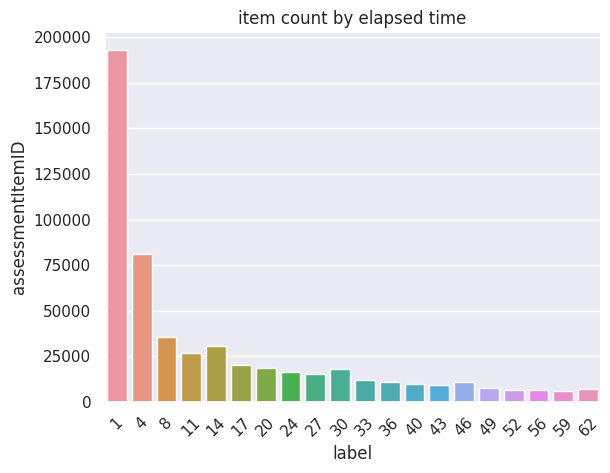

In [62]:
# answerCode가 0인 문항의 elapsed time의 분포 - 0-3초 사이의 값이 압도적으로 많다

fig, ax = plt.subplots()

df_bar = label_answerCode_groupby[label_answerCode_groupby['answerCode'] == 0].head(20)

ax.set_title("item count by elapsed time")
sns.barplot(data=df_bar, x="label", y='assessmentItemID')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1'),
  Text(1, 0, '4'),
  Text(2, 0, '8'),
  Text(3, 0, '11'),
  Text(4, 0, '14'),
  Text(5, 0, '17'),
  Text(6, 0, '20'),
  Text(7, 0, '24'),
  Text(8, 0, '27'),
  Text(9, 0, '30'),
  Text(10, 0, '33'),
  Text(11, 0, '36'),
  Text(12, 0, '40'),
  Text(13, 0, '43'),
  Text(14, 0, '46'),
  Text(15, 0, '49'),
  Text(16, 0, '52'),
  Text(17, 0, '56'),
  Text(18, 0, '59'),
  Text(19, 0, '62')])

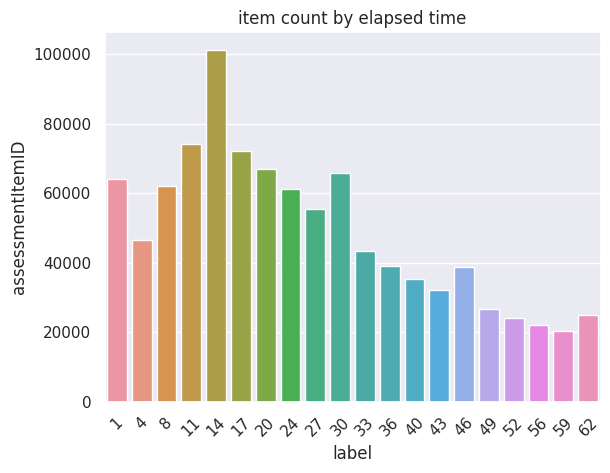

In [63]:
# answerCode가 1인 문항의 elapsed time의 분포 - 오답인 경우에 비해 고른 분포를 보여주고, 12-16 사이에 가장 높다

fig, ax = plt.subplots()

df_bar = label_answerCode_groupby[label_answerCode_groupby['answerCode'] == 1].head(20)

ax.set_title("item count by elapsed time")
sns.barplot(data=df_bar, x="label", y='assessmentItemID')
plt.xticks(rotation=45)

In [64]:
"""
timestamp가 문제를 처음 본 시간을 기준으로 할 가능성이 높아서 
유저의 다양한 특성에 의해 각 문항의 elapsed time만으로 정보가 부족할 것 같다.

유저의 평균 elapsed time을 새로운 feature로 도입하는 것은 어떨까?

만약 문제를 처음에 한번씩 훑고 문제를 풀기 시작하는 유저라면 
각 elapsed time에 비해 평균 elapsed time이 좀더 의미 있는 정보가 되지 않을까?
"""

user_groupby = df.groupby('userID').agg({'elapsed':'mean', 'answerCode':'mean'})

In [65]:
user_groupby

,elapsed,answerCode
userID,,
0,35.522244,0.630872
1,79.212020,0.853162
2,48.773481,0.612319
3,48.919656,0.692754
4,64.063781,0.694030
...,...,...
7437,18.583333,0.375000
7438,66.000000,0.750000
7439,47.300000,0.733333


<Axes: title={'center': 'answer rate by mean elapsed time'}, xlabel='elapsed', ylabel='answerCode'>

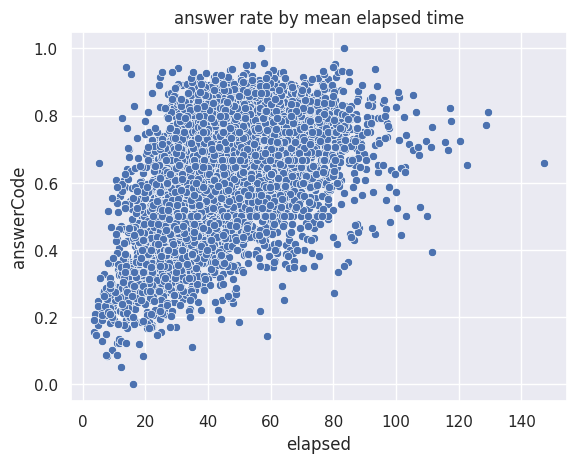

In [66]:
# 미션에 있는 IQR을 이용해서 elapsed의 이상치를 제거해 nan 값으로 채웠다 (upper_bound만)
# 개산할 수 없는 값은 0이 아닌 nan 값으로 지정해 평균에 포함되지 않도록 했다

fig, ax = plt.subplots()

ax.set_title("answer rate by mean elapsed time")
sns.scatterplot(data=user_groupby, 
            x="elapsed", y="answerCode")

In [67]:
user_groupby.corr()['elapsed']['answerCode'] # 유의미한 상관관계를 보여준다

# 유저의 평균 문제 풀이 시간을 feature로 사용해도 되지 않을까?

0.5321430739703918

In [68]:
elapsed_answer = df_copy.groupby('elapsed').agg({'answerCode': 'mean', 'userID': 'count'})
elapsed_hist = elapsed_answer[elapsed_answer['userID'] > 100]

(-10.0, 650.0)

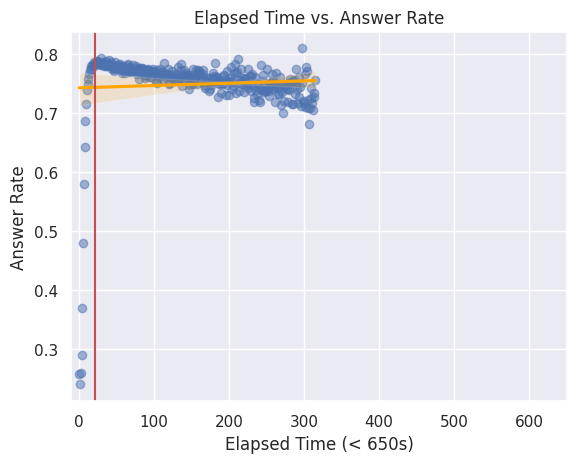

In [69]:
fig, ax = plt.subplots()
g = sns.regplot(x=elapsed_hist.index[:-1], y=elapsed_hist.answerCode.values[:-1],
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ax=ax)
ax.set_title('Elapsed Time vs. Answer Rate')
ax.set_xlabel('Elapsed Time (< 650s)')
ax.set_ylabel('Answer Rate')
ax.axvline(22, color='r')
ax.set_xlim(-10, 650)

In [70]:
elapsed_answer = elapsed_answer.reset_index()

In [71]:
elapsed_answer.corr()['elapsed']['answerCode'] 

0.05199490637095623

## Knowledge Tag

In [143]:
df['month'] = df['Timestamp'].dt.month

In [144]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour,difficulty,elapsed,month,season
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0,060,3.0,3,spring
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0,060,8.0,3,spring
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0,060,7.0,3,spring
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0,060,7.0,3,spring
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0,060,11.0,3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7,040,NaN,8,summer
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23,040,18.0,10,fall
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23,040,NaN,10,fall
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23,040,89.0,10,fall


In [185]:
month_groupby_2 = df.groupby(['month', 'difficulty']).agg({'assessmentItemID':'count', 'answerCode':'mean'})

In [186]:
month_groupby_2 = month_groupby_2.reset_index()
month_groupby_2

,month,difficulty,assessmentItemID,answerCode
0,1,010,3653,0.848070
1,1,020,4403,0.771974
2,1,030,6342,0.730684
3,1,040,7035,0.655721
4,1,050,8440,0.667536
...,...,...,...,...
94,12,030,5,0.800000
95,12,060,11,0.818182
96,12,070,39134,0.505903
97,12,080,26738,0.506807


In [197]:
total = df.groupby('month').assessmentItemID.count().to_dict()
month_groupby_2['percentage'] = month_groupby_2['assessmentItemID'] / month_groupby_2['month'].map(total)
month_groupby_2

,month,difficulty,assessmentItemID,answerCode,percentage
0,1,010,3653,0.848070,0.087440
1,1,020,4403,0.771974,0.105393
2,1,030,6342,0.730684,0.151806
3,1,040,7035,0.655721,0.168394
4,1,050,8440,0.667536,0.202025
...,...,...,...,...,...
94,12,030,5,0.800000,0.000071
95,12,060,11,0.818182,0.000156
96,12,070,39134,0.505903,0.556149
97,12,080,26738,0.506807,0.379985


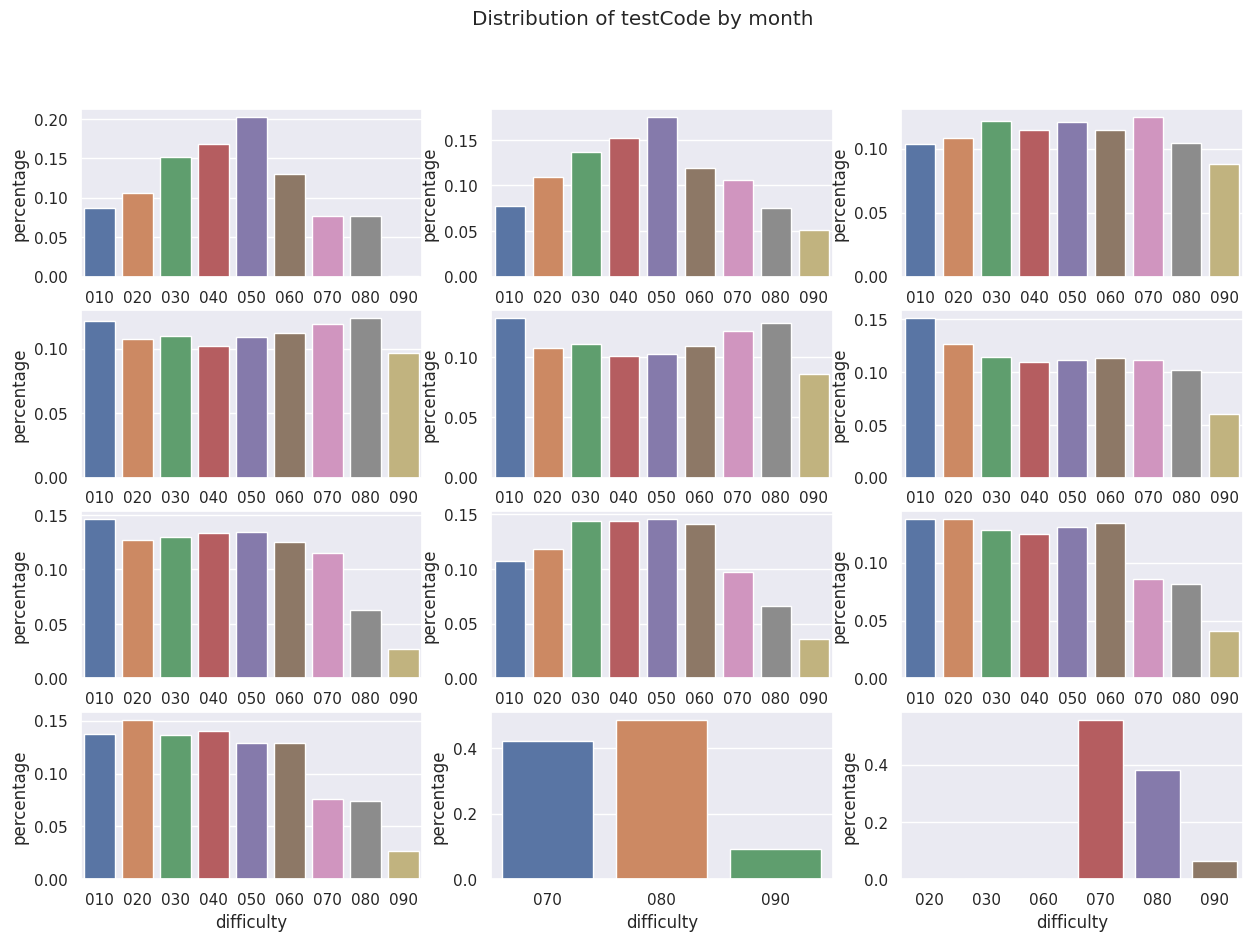

In [212]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

fig.suptitle("Distribution of testCode by month")

for i, ax in enumerate(axes.flatten()):
    sns.barplot(data=month_groupby_2[month_groupby_2['month'] == i+1],
            x="difficulty", y='percentage', ax=ax)

In [198]:
month_groupby_2[month_groupby_2['month'] == 1]

,month,difficulty,assessmentItemID,answerCode,percentage
0,1,010,3653,0.848070,0.087440
1,1,020,4403,0.771974,0.105393
2,1,030,6342,0.730684,0.151806
3,1,040,7035,0.655721,0.168394
4,1,050,8440,0.667536,0.202025
5,1,060,5442,0.812018,0.130263
6,1,070,3210,0.561059,0.076837
7,1,080,3228,0.589219,0.077267
8,1,090,24,0.875000,0.000574


In [179]:
month_groupby_2[month_groupby_2['month'] == 9]

,index,month,difficulty,assessmentItemID,answerCode
72,72,9,010,51931,0.788161
73,73,9,020,51800,0.756834
74,74,9,030,48202,0.657442
75,75,9,040,46895,0.699712
76,76,9,050,49161,0.674173
77,77,9,060,50486,0.700967
78,78,9,070,32418,0.531186
79,79,9,080,30650,0.500392
80,80,9,090,15437,0.448468


In [181]:
month_groupby_2[month_groupby_2['month'] == 12]

,index,month,difficulty,assessmentItemID,answerCode
93,93,12,020,8,0.875000
94,94,12,030,5,0.800000
95,95,12,060,11,0.818182
96,96,12,070,39134,0.505903
97,97,12,080,26738,0.506807
98,98,12,090,4470,0.366890


In [145]:
month_groupby = df.groupby(['month', 'KnowledgeTag']).agg({'assessmentItemID':'count', 'answerCode':'mean'})

In [146]:
month_groupby

assessmentItemID  answerCode
month KnowledgeTag                              
1     23                           8    0.500000
      24                           2    0.000000
      26                           5    0.800000
      30                           1    0.000000
      31                           3    0.333333
...                              ...         ...
12    10819                       76    0.671053
      10834                       51    0.784314
      10837                      134    0.328358
      10838                       44    0.772727
      10841                      155    0.464516

[9076 rows x 2 columns]

In [147]:
month_groupby = month_groupby.reset_index()

month_groupby

,month,KnowledgeTag,assessmentItemID,answerCode
0,1,23,8,0.500000
1,1,24,2,0.000000
2,1,26,5,0.800000
3,1,30,1,0.000000
4,1,31,3,0.333333
...,...,...,...,...
9071,12,10819,76,0.671053
9072,12,10834,51,0.784314
9073,12,10837,134,0.328358
9074,12,10838,44,0.772727


In [148]:
# KnowledgeTag를 천의 자리수를 기준으로 bining

month_groupby['label'] = month_groupby.KnowledgeTag.apply(lambda x: x//1000)

In [149]:
# 각 KnowledgeTag가 각 월에서 차지하는 비율을 계산

total_count = month_groupby.groupby('month').agg({'assessmentItemID':'sum'}).to_dict()
month_groupby['percentage'] = month_groupby['assessmentItemID'] / month_groupby.month.map(total_count['assessmentItemID'])

/tmp/ipykernel_25963/1845198158.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 3],
/tmp/ipykernel_25963/1845198158.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 4],
/tmp/ipykernel_25963/1845198158.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 5],
/tmp/ipykernel_25963/1845198158.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 9],
/tmp/ipykernel_25963/1845198158.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 10],
/tmp/ipykernel_25963/

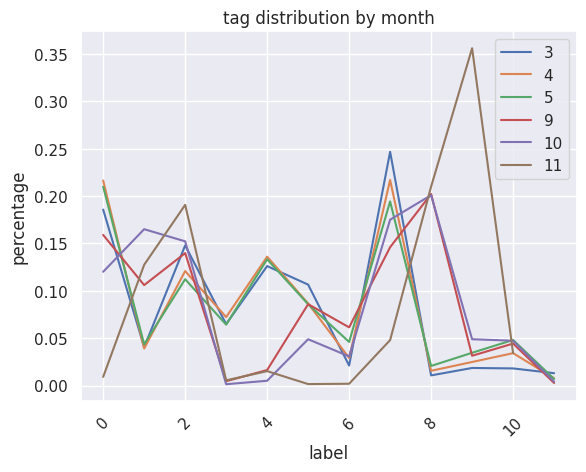

In [151]:
# 3, 4, 5, 9, 10, 11월의 KnowledgeTag 분포

fig, ax = plt.subplots()

ax.set_title("tag distribution by month")
sns.lineplot(data=month_groupby[month_groupby['month'] == 3],
            x="label", y='percentage', ci=None, estimator=sum, label='3')
sns.lineplot(data=month_groupby[month_groupby['month'] == 4],
            x="label", y='percentage', ci=None, estimator=sum, label='4')
sns.lineplot(data=month_groupby[month_groupby['month'] == 5],
            x="label", y='percentage', ci=None, estimator=sum, label='5')
sns.lineplot(data=month_groupby[month_groupby['month'] == 9],
            x="label", y='percentage', ci=None, estimator=sum, label='9')
sns.lineplot(data=month_groupby[month_groupby['month'] == 10],
            x="label", y='percentage', ci=None, estimator=sum, label='10')
sns.lineplot(data=month_groupby[month_groupby['month'] == 11],
            x="label", y='percentage', ci=None, estimator=sum, label='11')

plt.xticks(rotation=45)
plt.legend()

# 그래프를 통해 3, 4, 5의 분포가 비슷하고, 9, 10의 분포가 비슷하다는 것을 알 수 있다.

/tmp/ipykernel_25963/3683234754.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 12],
/tmp/ipykernel_25963/3683234754.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 1],
/tmp/ipykernel_25963/3683234754.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 2],
/tmp/ipykernel_25963/3683234754.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 6],
/tmp/ipykernel_25963/3683234754.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 7],
/tmp/ipykernel_25963/

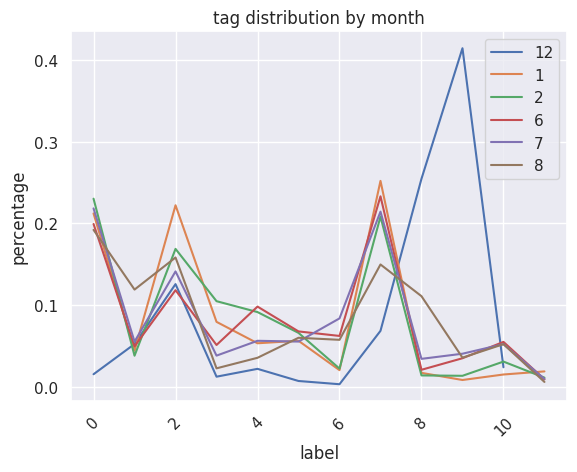

In [152]:
# 3, 4, 5, 9, 10, 11월의 KnowledgeTag 분포

fig, ax = plt.subplots()

ax.set_title("tag distribution by month")
sns.lineplot(data=month_groupby[month_groupby['month'] == 12],
            x="label", y='percentage', ci=None, estimator=sum, label='12')
sns.lineplot(data=month_groupby[month_groupby['month'] == 1],
            x="label", y='percentage', ci=None, estimator=sum, label='1')
sns.lineplot(data=month_groupby[month_groupby['month'] == 2],
            x="label", y='percentage', ci=None, estimator=sum, label='2')
sns.lineplot(data=month_groupby[month_groupby['month'] == 6],
            x="label", y='percentage', ci=None, estimator=sum, label='6')
sns.lineplot(data=month_groupby[month_groupby['month'] == 7],
            x="label", y='percentage', ci=None, estimator=sum, label='7')
sns.lineplot(data=month_groupby[month_groupby['month'] == 8],
            x="label", y='percentage', ci=None, estimator=sum, label='8')

plt.xticks(rotation=45)
plt.legend()

# 그래프를 통해 3, 4, 5의 분포가 비슷하고, 9, 10의 분포가 비슷하다는 것을 알 수 있다.

/tmp/ipykernel_25963/727643225.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 12],
/tmp/ipykernel_25963/727643225.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 11],


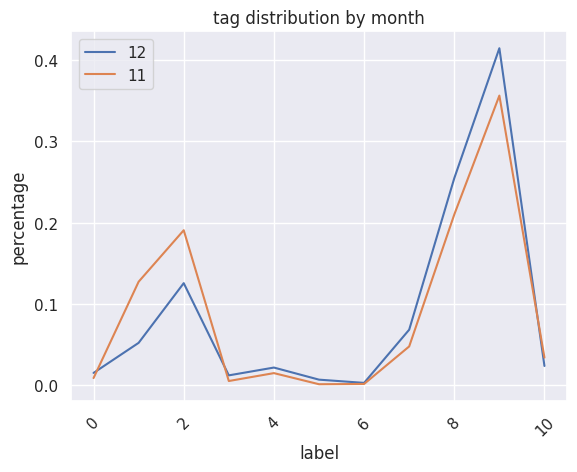

In [159]:
fig, ax = plt.subplots()

ax.set_title("tag distribution by month")
sns.lineplot(data=month_groupby[month_groupby['month'] == 12],
            x="label", y='percentage', ci=None, estimator=sum, label='12')
sns.lineplot(data=month_groupby[month_groupby['month'] == 11],
            x="label", y='percentage', ci=None, estimator=sum, label='11')
plt.xticks(rotation=45)
plt.legend()

/tmp/ipykernel_25963/1617502826.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 3],
/tmp/ipykernel_25963/1617502826.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 4],
/tmp/ipykernel_25963/1617502826.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 5],


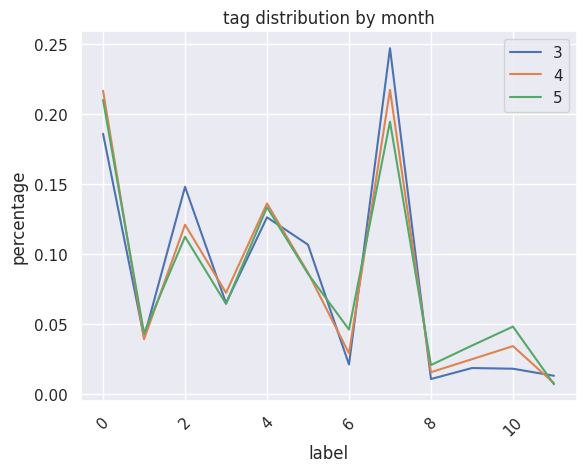

In [154]:
fig, ax = plt.subplots()

ax.set_title("tag distribution by month")
sns.lineplot(data=month_groupby[month_groupby['month'] == 3],
            x="label", y='percentage', ci=None, estimator=sum, label='3')
sns.lineplot(data=month_groupby[month_groupby['month'] == 4],
            x="label", y='percentage', ci=None, estimator=sum, label='4')
sns.lineplot(data=month_groupby[month_groupby['month'] == 5],
            x="label", y='percentage', ci=None, estimator=sum, label='5')

plt.xticks(rotation=45)
plt.legend()

/tmp/ipykernel_25963/3005152062.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 8],
/tmp/ipykernel_25963/3005152062.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 9],
/tmp/ipykernel_25963/3005152062.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 10],


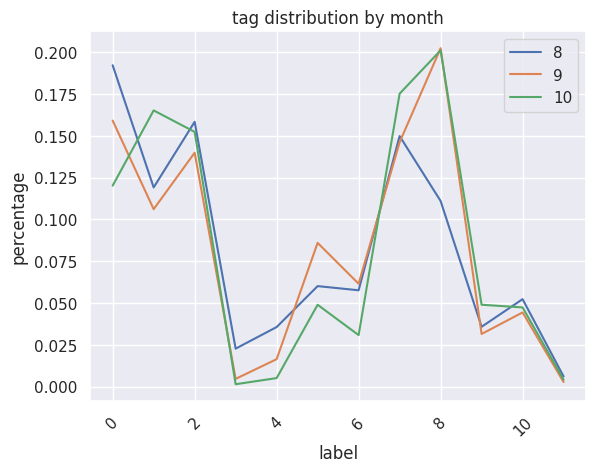

In [155]:
fig, ax = plt.subplots()

ax.set_title("tag distribution by month")
sns.lineplot(data=month_groupby[month_groupby['month'] == 8],
            x="label", y='percentage', ci=None, estimator=sum, label='8')
sns.lineplot(data=month_groupby[month_groupby['month'] == 9],
            x="label", y='percentage', ci=None, estimator=sum, label='9')
sns.lineplot(data=month_groupby[month_groupby['month'] == 10],
            x="label", y='percentage', ci=None, estimator=sum, label='10')

plt.xticks(rotation=45)
plt.legend()

/tmp/ipykernel_25963/1372715550.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 1],
/tmp/ipykernel_25963/1372715550.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 2],


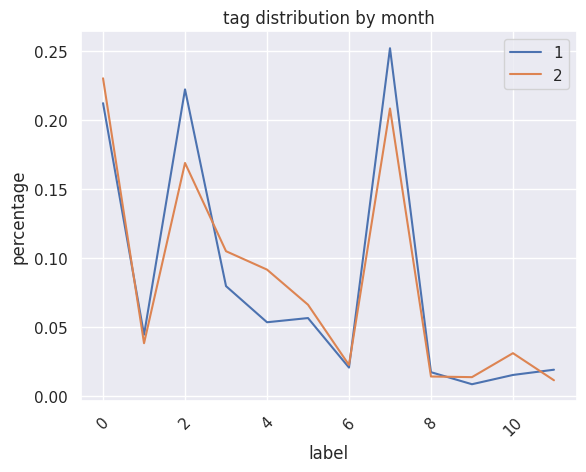

In [157]:
fig, ax = plt.subplots()

ax.set_title("tag distribution by month")
sns.lineplot(data=month_groupby[month_groupby['month'] == 1],
            x="label", y='percentage', ci=None, estimator=sum, label='1')
sns.lineplot(data=month_groupby[month_groupby['month'] == 2],
            x="label", y='percentage', ci=None, estimator=sum, label='2')

plt.xticks(rotation=45)
plt.legend()

/tmp/ipykernel_25963/3162502149.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 6],
/tmp/ipykernel_25963/3162502149.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_groupby[month_groupby['month'] == 7],


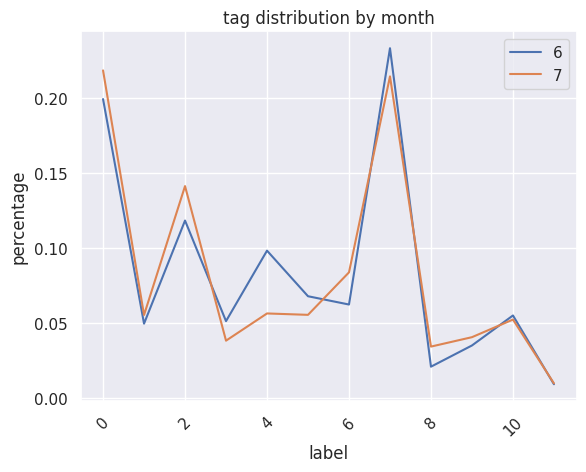

In [162]:
fig, ax = plt.subplots()

ax.set_title("tag distribution by month")
sns.lineplot(data=month_groupby[month_groupby['month'] == 6],
            x="label", y='percentage', ci=None, estimator=sum, label='6')
sns.lineplot(data=month_groupby[month_groupby['month'] == 7],
            x="label", y='percentage', ci=None, estimator=sum, label='7')

plt.xticks(rotation=45)
plt.legend()

month를 (1, 2), (3, 4, 5), (6, 7), (8, 9, 10), (11, 12)로 bining할 수 있지 않을까? 

In [130]:
def season_map(x):
    if x in [3, 4, 5]:
        return 'spring'
    elif x in [6, 7, 8]:
        return 'summer'
    elif x in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'
    
df['season'] = df.month.apply(season_map)

In [131]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour,difficulty,elapsed,month,season
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0,060,3.0,3,spring
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0,060,8.0,3,spring
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0,060,7.0,3,spring
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0,060,7.0,3,spring
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0,060,11.0,3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7,040,NaN,8,summer
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23,040,18.0,10,fall
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23,040,NaN,10,fall
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23,040,89.0,10,fall


In [132]:
season_groupby = df.groupby(['season', 'KnowledgeTag']).agg({'assessmentItemID':'count', 'answerCode':'mean'})

In [133]:
season_groupby = season_groupby.reset_index()

season_groupby

,season,KnowledgeTag,assessmentItemID,answerCode
0,fall,23,964,0.557054
1,fall,24,186,0.607527
2,fall,25,55,0.836364
3,fall,26,1420,0.587324
4,fall,30,365,0.490411
...,...,...,...,...
3579,winter,11253,343,0.763848
3580,winter,11265,11,0.727273
3581,winter,11269,477,0.509434
3582,winter,11270,13,0.230769


In [135]:
item_sum = season_groupby.groupby('season').agg({'assessmentItemID':'sum'}).to_dict()
season_groupby['percentage'] = season_groupby['assessmentItemID'] / season_groupby.season.map(item_sum['assessmentItemID'])

In [137]:
season_groupby['label'] = season_groupby.KnowledgeTag.apply(lambda x: x//1000)

In [138]:
season_groupby

,season,KnowledgeTag,assessmentItemID,answerCode,percentage,label
0,fall,23,964,0.557054,0.001176,0
1,fall,24,186,0.607527,0.000227,0
2,fall,25,55,0.836364,0.000067,0
3,fall,26,1420,0.587324,0.001733,0
4,fall,30,365,0.490411,0.000445,0
...,...,...,...,...,...,...
3579,winter,11253,343,0.763848,0.001714,11
3580,winter,11265,11,0.727273,0.000055,11
3581,winter,11269,477,0.509434,0.002384,11
3582,winter,11270,13,0.230769,0.000065,11


/tmp/ipykernel_25963/3705437731.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=season_groupby[season_groupby['season'] == 'spring'],
/tmp/ipykernel_25963/3705437731.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=season_groupby[season_groupby['season'] == 'summer'],
/tmp/ipykernel_25963/3705437731.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=season_groupby[season_groupby['season'] == 'fall'],
/tmp/ipykernel_25963/3705437731.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=season_groupby[season_groupby['season'] == 'winter'],


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

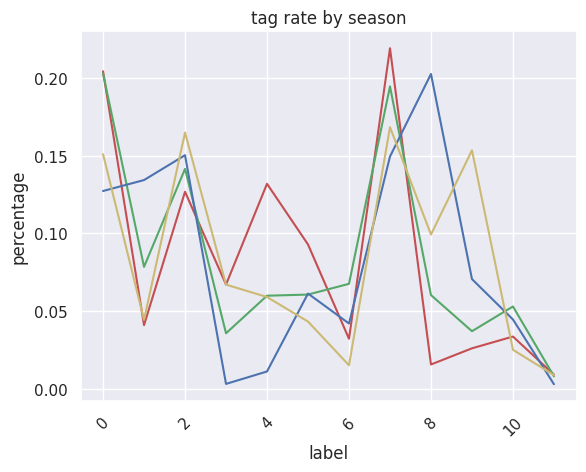

In [139]:
fig, ax = plt.subplots()

ax.set_title("tag rate by season")
sns.lineplot(data=season_groupby[season_groupby['season'] == 'spring'],
            x="label", y='percentage', ci=None, color='r', estimator=sum)
sns.lineplot(data=season_groupby[season_groupby['season'] == 'summer'],
            x="label", y='percentage', ci=None, color='g', estimator=sum)
sns.lineplot(data=season_groupby[season_groupby['season'] == 'fall'], 
            x="label", y='percentage', ci=None, color='b', estimator=sum)
sns.lineplot(data=season_groupby[season_groupby['season'] == 'winter'],
            x="label", y='percentage', ci=None, color='y', estimator=sum)

plt.xticks(rotation=45)

## assessemtnItemID

In [ ]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,date,hour,difficulty,elapsed,month,season
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,2020-03-24,0,060,3.0,3,spring
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,2020-03-24,0,060,8.0,3,spring
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,2020-03-24,0,060,7.0,3,spring
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,2020-03-24,0,060,7.0,3,spring
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,2020-03-24,0,060,11.0,3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...
259365,7439,A040197006,A040000197,1,2020-08-21 07:39:45,2132,2020-08-21,7,040,NaN,8,summer
259366,7439,A040130001,A040000130,0,2020-10-14 23:07:23,8832,2020-10-14,23,040,18.0,10,fall
259367,7439,A040130002,A040000130,1,2020-10-14 23:07:41,8832,2020-10-14,23,040,NaN,10,fall
259368,7439,A040130003,A040000130,1,2020-10-14 23:08:02,8244,2020-10-14,23,040,89.0,10,fall


In [ ]:
assessment_groupby = df.groupby('assessmentItemID').agg({'answerCode':'mean', 'userID':'count'})

In [ ]:
assessment_groupby = assessment_groupby.reset_index()
assessment_groupby

,index,assessmentItemID,answerCode,userID
0,0,A010001001,0.922857,350
1,1,A010001002,0.960000,350
2,2,A010001003,0.905714,350
3,3,A010001004,0.945714,350
4,4,A010001005,0.882857,350
...,...,...,...,...
9449,9449,A090074002,0.480000,50
9450,9450,A090074003,0.580000,50
9451,9451,A090074004,0.360000,50
9452,9452,A090074005,0.400000,50


In [ ]:
assessment_user_groupby = assessment_groupby.groupby('userID').agg({'assessmentItemID':'count'})

In [ ]:
assessment_user_groupby

,assessmentItemID
userID,
46,1
47,1
48,1
49,8
50,391
97,1
98,2
99,19
100,385
